In [2]:
import pandas as pd
messages=pd.read_csv('SMSSpamCollection',sep='\t',names=["label","message"])

In [4]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.shape

(5572, 2)

## Data Cleaning

In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# check for duplicates
messages.duplicated().sum()

403

In [10]:
# remove duplicates
messages = messages.drop_duplicates(keep='first')

In [12]:
messages.duplicated().sum()

0

In [13]:
messages.shape

(5169, 2)

## Exploratory Data Analysis - EDA

In [15]:
messages['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

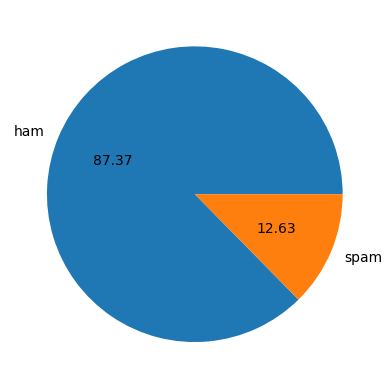

In [16]:
import matplotlib.pyplot as plt
plt.pie(messages['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is imbalanced

In [17]:
import nltk
messages['num_characters']= messages['message'].apply(len)

C:\Users\sachi\AppData\Local\Temp\ipykernel_2200\3579726317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages['num_characters']= messages['message'].apply(len)


In [18]:
messages.shape

(5169, 3)

In [20]:
messages.head()

,label,message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# num of words
messages['num_words'] = messages['message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\sachi\AppData\Local\Temp\ipykernel_2200\2225583027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages['num_words'] = messages['message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [24]:
messages.head()

,label,message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
messages['num_sentences'] = messages['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\sachi\AppData\Local\Temp\ipykernel_2200\2253612454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages['num_sentences'] = messages['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
messages.head()

,label,message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
messages[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
messages[messages['label'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam
messages[messages['label'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


plot histogram

<Axes: xlabel='num_characters', ylabel='Count'>

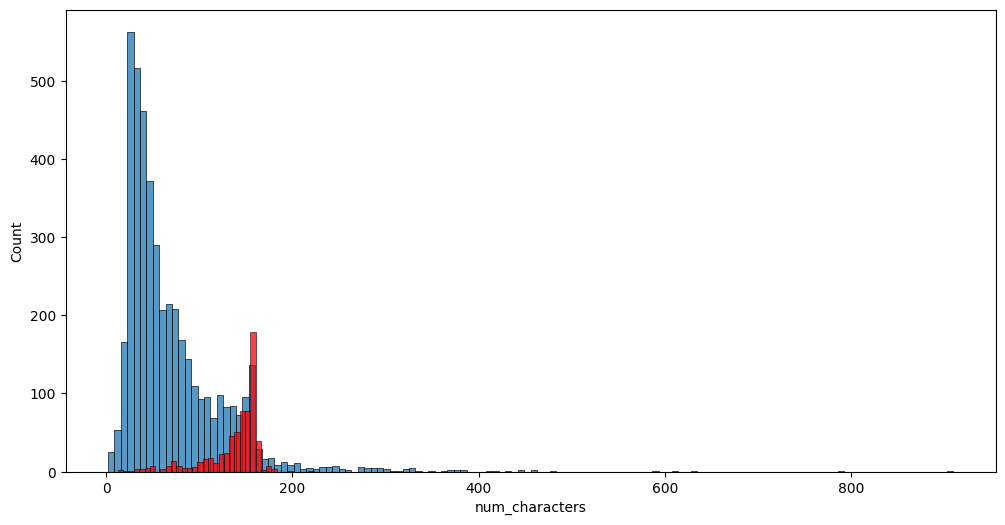

In [33]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(messages[messages['label'] == 'ham']['num_characters'])
sns.histplot(messages[messages['label'] == 'spam']['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

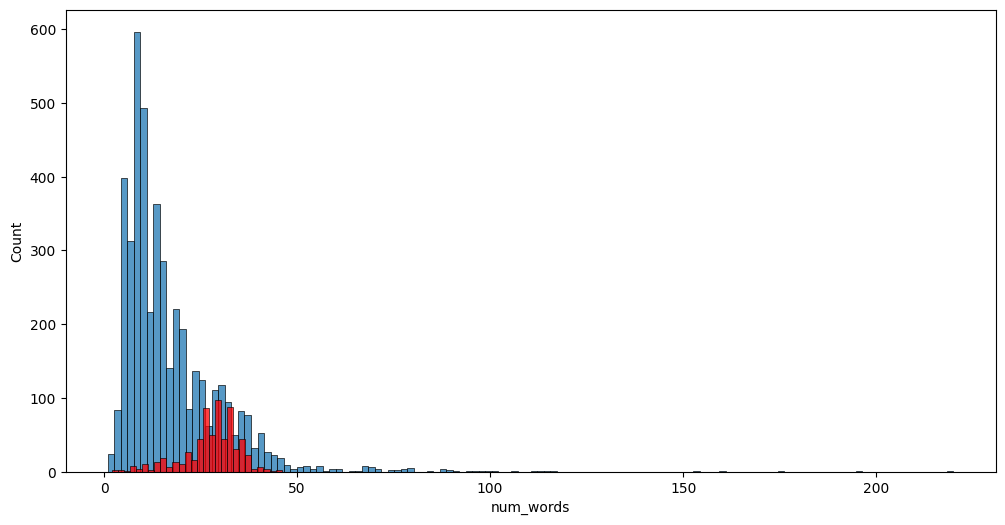

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(messages[messages['label'] == 'ham']['num_words'])
sns.histplot(messages[messages['label'] == 'spam']['num_words'],color='red')

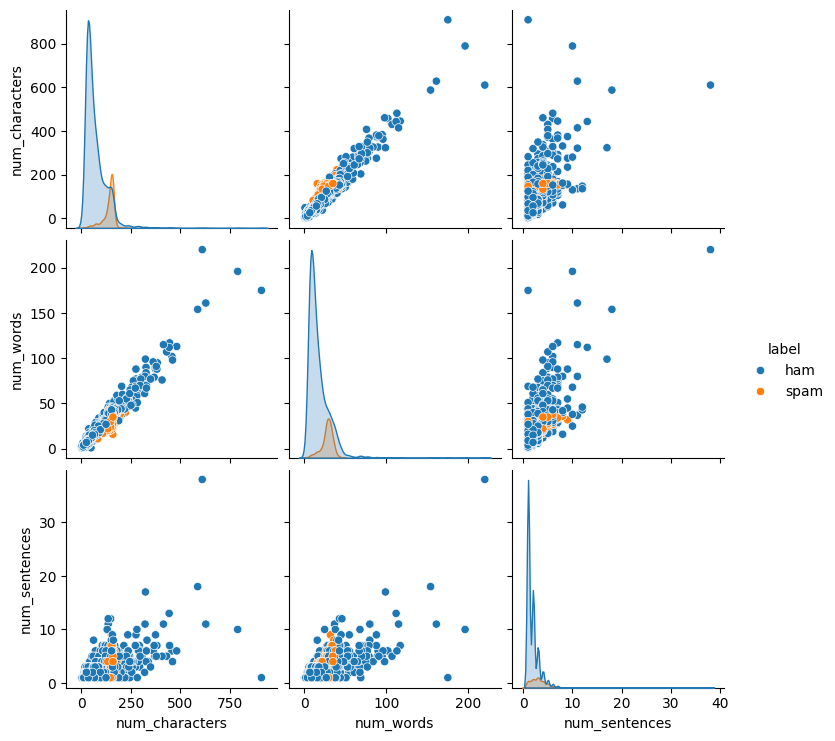

In [37]:
sns.pairplot(messages,hue='label')